# Airline Passenger Satisfaction Prediction

## Name : Amin Baiju , Student ID : GH1032603

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

The link for the dataset

  "https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction"

In [63]:
df = pd.read_csv("/content/airline_data.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### 1. Problem Statement
 . Customer satisfaction is a crucial factor for airline companies to retain customers and improve services. airlines need to identify key factors impacting customer satisfaction and take proactive measures .

 The goal is to predict passenger satisfaction using flight and service data.
 how this will impact the business is higher customer satisfaction translates to increased customer retention .

 This is formulated as a machine learning task as a binary classifictaion problem( satisfied:1  , dissatisfied:0  ) . passenger demographics , flight details and service ratings are added as input features

### 2. Data exploration(EDA)

checking missing values

In [39]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [40]:
df['Arrival Delay in Minutes'].fillna(0, inplace=True)

<ipython-input-40-34c92eb34715>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(0, inplace=True)


 . missing values handled

 . some categorical variables need encoding

Target distribution

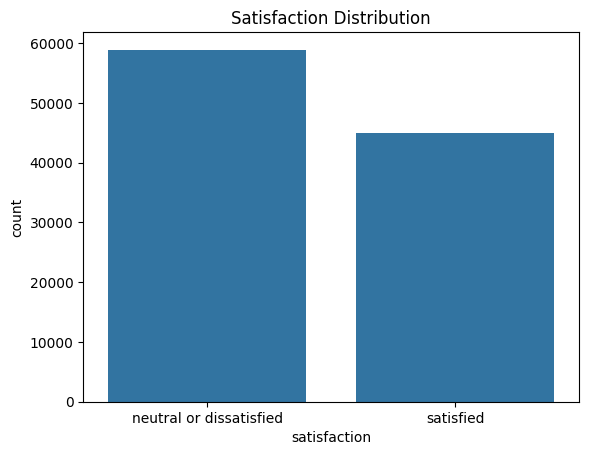

In [42]:
sns.countplot(x=df["satisfaction"])
plt.title("Satisfaction Distribution")
plt.show()

 . dataset is slightly imbalanced but not severe

dropping unnessecary columns

In [43]:
df = df.drop(columns=['Unnamed: 0', 'id' , 'Type of Travel'])
df.head()

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Eco Plus,460,3,4,3,1,5,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business,235,3,2,3,3,1,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business,1142,2,2,2,2,5,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business,562,2,5,5,5,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business,214,3,3,3,3,4,...,3,3,4,4,3,3,3,0,0.0,satisfied


### 3. Data preprocessing and Feature Engineering

handling categorical variables

In [44]:
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])
df["Class"] = LabelEncoder().fit_transform(df["Class"])
df["Customer Type"] = LabelEncoder().fit_transform(df["Customer Type"])
df["satisfaction"] = df["satisfaction"].map({"satisfied": 1, "neutral or dissatisfied": 0})

feature scaling

In [45]:
scaler = StandardScaler()
num_cols = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
df[num_cols] = scaler.fit_transform(df[num_cols])

In [46]:
df.head()

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,-1.745279,2,-0.731539,3,4,3,1,5,...,5,4,3,4,4,5,5,0.266393,0.074169,0
1,1,1,-0.951360,0,-0.957184,3,2,3,3,1,...,1,1,5,3,1,4,1,-0.361375,-0.236313,0
2,0,0,-0.885200,0,-0.047584,2,2,2,2,5,...,5,4,3,4,4,4,5,-0.387532,-0.391554,1
3,0,0,-0.951360,0,-0.629246,2,5,5,5,2,...,2,2,5,3,1,4,2,-0.099805,-0.158692,0
4,1,0,1.430397,0,-0.978244,3,3,3,3,4,...,3,3,4,4,3,3,3,-0.387532,-0.391554,1


train test split

In [47]:
X = df.drop(columns=["satisfaction"])
y = df["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 4. Model training and Hyperparameter tuning

training and comparing models

In [48]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

results

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:49:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'Logistic Regression': 0.8489004379000048,
 'Random Forest': 0.9552957028054473,
 'XGBoost': 0.9587122852605746}

model selection

In [49]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"Best Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")

Best Model: XGBoost with Accuracy: 0.9587


hyperparameter tuning

In [55]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False)

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
random_search.fit(X_train, y_train)

best_xgb_random = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:17:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.9}


Model training with best hyperparameters

In [56]:
best_xgb_random = XGBClassifier(
    subsample=1.0,
    n_estimators=300,
    max_depth=7,
    learning_rate=0.1,
    colsample_bytree=0.9,
    use_label_encoder=False
)

best_xgb_random.fit(X_train, y_train)

train_accuracy = best_xgb_random.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

test_accuracy = best_xgb_random.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.9793
Test Accuracy: 0.9598


The model is performing exceptionally well, with test accuracy of 95.98%. This shows that the model can generalize well to unseen data.

feature importance representaion

<ipython-input-59-3479c43725e9>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


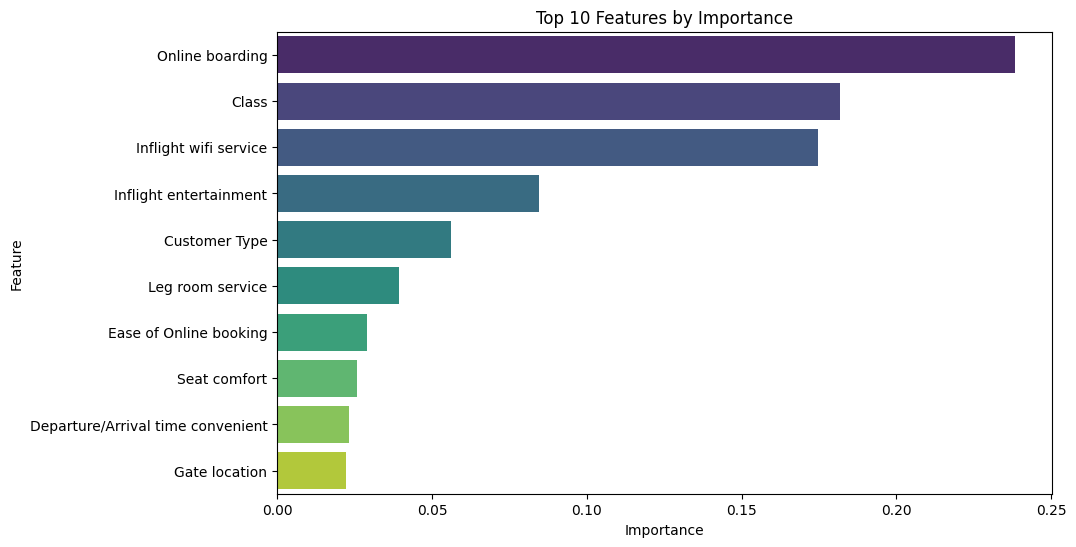

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = best_xgb_random.feature_importances_

features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Features by Importance')
plt.show()

this feature importance graph shows the key areas which impact customer satisfaction, the airline can proiritise improving these areas

### 5. Final discussion

 . while the pipeline demonstrates an efficient approch to predicting passesnger satisfaction with a test accuracy score of 95.98% , which suggests that it performs well not only on training data but also on unseen data, the model may still be overfitting since the training accuracy of 97.93% is considerably higher than the test accuracy

 . the feature importance visualisation shows us which factors impact customer satisfaction the most and that those are the target areas for improvment for an airline

 . some data driven reccomendations are

 1)improving key services like online boarding and inflight wifi services will lead to higher overall satisfaction to passengers

 2)entertainment option in the flight are a key factor in guaranteeing higher satisfaction

 3)diffrent customer classes and types have diffrent expectations and satisfaction drivers , tending to those are important

 #### Conclusion

  the pipeline implemented provides a reliable high performing model that can predict customer satisfaction with high accuracy. The feature importance analysis offers clear guidance on areas to improve for better customer experiences. With some fine tuning and optimization, especially in hyperparameter tuning and model interpretability, this pipeline can be a powerful tool for airlines to increase satisfaction and retain more customers.